In this tutorial we will optimize the neural network capability and optimize the shallow network we have build in the previous module deep_mnist_explore.jpynb.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.initializers import Zeros, RandomNormal
from tensorflow.keras.initializers import glorot_normal, glorot_uniform

We first select the inputs of 784 pixels and the number of neurons in the dense layer of 256. We also initilize b and w of our neural network function. Large w and b values tend to correspond to larger z which means that our neurons are saturated. On the other hand large parameter values would imply that the network has a strong opinion towards how x relates to y before we have trained the model. We select the paramter of 0 for our b's and we select a random number near 0 for our w's. The two parameter b and w should not be the same to avoid treating the x values the same. 

In [17]:
n_input = 784
n_dense = 256

b_init = Zeros()
w_init = RandomNormal(stddev=4.0)

In [18]:
model = Sequential()
model.add(
    Dense(
        n_dense,
        input_dim=n_input,
        kernel_initializer=w_init,
        bias_initializer=b_init
        )
    )
model.add(Activation("sigmoid"))

In [19]:
x = np.random.random((1, n_input))

In [20]:
a = model.predict(x)

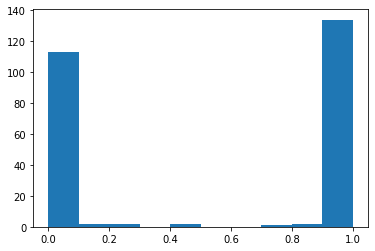

In [21]:
_ = plt.hist(np.transpose(a))

This activation is rather undersired since they are pressed up against the extremes of the range. This means that when encouraging a sample from a normal distribution as in our case via the Random function we end up encouraging large values for "z" which is ultimately undesireable. This in contrast means that a vast majority of neurons in the layer are saturated and that the neurons have strong opininions how x would influence y before training on data. 

## Glorot/ Xavier Distributions to overcome deep feedforward neural network training difficulty

To avoid any warnings please restart the notebook and just re-run this part. By just overwriting model from above we throw up a warning in tensorflow.

In [30]:
n_input = 784
n_dense = 256

b_init = Zeros()
w_init = glorot_normal()

In [31]:
model2 = Sequential()
model2.add(
    Dense(
        n_dense,
        input_dim=n_input,
        kernel_initializer=w_init,
        bias_initializer=b_init
        )
    )
model2.add(Activation("sigmoid"))

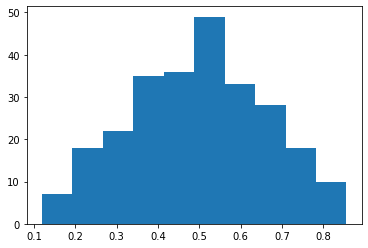

In [32]:
x = np.random.random((1, n_input))
a = model2.predict(x)
_ = plt.hist(np.transpose(a))

Now we created a good starting point because few if any neuronsare saturated and neurons have generally weak opinions about how x would influence y. 